In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Forecasting Country-Level University Rankings Using Economic and Educational Indicators: A Comparative Modeling Approach (2017–2024)

### Author Ivan Georgiev Georgiev 

## Abstract 

This project explores the feasibility of forecasting global university rankings at the country level using macroeconomic and educational indicators. Drawing on data from the QS World University Rankings (2017–2022) and country-level variables such as GDP per capita, literacy rate, and R&D expenditure, the analysis aims to predict each country’s average university rank in 2024.

To accomplish this, we apply and compare a set of forecasting methods, including:
- (1) Multiple Linear Regression to explain the influence of economic indicators,
- (2) ARIMAX to model time series with exogenous predictors
- (3) Linear Trend Extrapolation as a baseline.

These models were chosen for their interpretability and alignment with non–machine learning forecasting approaches suitable for limited time series data. 

- Baseline models (Moving Average, Exponential Smoothing)

Each model offers a different perspective—some prioritize time dynamics, while others emphasize economic context and uncertainty. Forecasts are validated using actual 2024 QS rankings where available. The results highlight both the predictive power of national-level indicators and the strengths and weaknesses of each forecasting technique.

This work provides a data-driven framework for understanding the evolution of educational performance across countries and suggests how policymakers and academic stakeholders might respond to long-term trends in global rankings. 

## Introduction 
The QS World University Rankings provide an annual benchmark for academic performance globally. Forecasting university rankings at the country level can help identify macroeconomic and policy factors that drive academic excellence and anticipate future shifts in global education.

We use four forecasting models to estimate the average country-level QS university ranking for 2024. Each model is based on different mathematical principles:

1. Linear Trend Extrapolation
We fit a linear regression model to each country’s historical average rank over time:




Each model captures different assumptions: trend continuity (linear), economic impact (Monte Carlo), recent stability (MA), or momentum (smoothing). These approaches are compared quantitatively and visually in later sections.

In [14]:
# Load dataset
df = pd.read_csv("qs-world-university-rankings-2017-to-2022-V2.csv")

# Clean the data
df_clean = df.dropna(subset=["country", "year", "score"]).copy()

# Convert data types safely
df_clean.loc[:, "year"] = df_clean["year"].astype(int)
df_clean.loc[:, "score"] = pd.to_numeric(df_clean["score"], errors="coerce")
df_clean = df_clean.dropna(subset=["score"]).copy()

# Strip spaces in country names
df_clean.loc[:, "country"] = df_clean["country"].str.strip()

# Group by year and country, calculate average score
avg_scores = df_clean.groupby(["year", "country"], as_index=False)["score"].mean()

# ✅ Correct usage of include_group=False (outside the lambda!)
top10_by_year = (
    avg_scores.groupby("year", group_keys=False)
    .apply(lambda x: x.sort_values("score", ascending=False).head(10))
    .reset_index(drop=True)
)

# Display results
for year in sorted(top10_by_year["year"].unique()):
    print(f"\n📅 Top 10 Countries in {year}:")
    display(top10_by_year[top10_by_year["year"] == year])


📅 Top 10 Countries in 2017:


C:\Users\User\AppData\Local\Temp\ipykernel_9288\601722915.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values("score", ascending=False).head(10))


,year,country,score
0,2017,Singapore,91.450000
1,2017,Hong Kong SAR,70.000000
2,2017,Switzerland,64.412500
3,2017,United States,58.312821
4,2017,United Kingdom,56.893750
5,2017,Japan,56.635714
6,2017,Netherlands,56.500000
7,2017,Denmark,56.400000
8,2017,South Korea,54.663636
9,2017,Canada,53.326667



📅 Top 10 Countries in 2018:


,year,country,score
10,2018,Singapore,91.350000
11,2018,Hong Kong SAR,71.616667
12,2018,Switzerland,63.987500
13,2018,United States,59.346667
14,2018,Japan,57.100000
15,2018,United Kingdom,56.621277
16,2018,Netherlands,56.538462
17,2018,Denmark,56.283333
18,2018,South Korea,56.127273
19,2018,China (Mainland),54.728571



📅 Top 10 Countries in 2019:


,year,country,score
20,2019,Singapore,68.933333
21,2019,Hong Kong SAR,67.900000
22,2019,Switzerland,60.175000
23,2019,Denmark,52.800000
24,2019,Netherlands,51.915385
25,2019,United Kingdom,51.849020
26,2019,Mexico,51.500000
27,2019,United States,50.404255
28,2019,Japan,48.764706
29,2019,Chile,47.750000



📅 Top 10 Countries in 2020:


,year,country,score
30,2020,Singapore,69.500000
31,2020,Hong Kong SAR,68.783333
32,2020,Switzerland,61.125000
33,2020,Mexico,53.650000
34,2020,Denmark,53.216667
35,2020,United Kingdom,51.190000
36,2020,Netherlands,51.130769
37,2020,United States,51.070787
38,2020,Japan,48.247059
39,2020,Sweden,47.337500



📅 Top 10 Countries in 2021:


,year,country,score
40,2021,Singapore,90.700000
41,2021,Hong Kong SAR,69.666667
42,2021,Switzerland,58.044444
43,2021,Mexico,54.350000
44,2021,Denmark,53.983333
45,2021,United States,50.796512
46,2021,United Kingdom,50.587755
47,2021,Chile,49.700000
48,2021,Netherlands,49.561538
49,2021,Japan,49.325000



📅 Top 10 Countries in 2022:


,year,country,score
50,2022,Singapore,92.350000
51,2022,Hong Kong SAR,71.333333
52,2022,Switzerland,59.088889
53,2022,Mexico,53.250000
54,2022,United Kingdom,51.914286
55,2022,Netherlands,51.815385
56,2022,United States,51.056322
57,2022,France,49.981818
58,2022,Japan,49.768750
59,2022,Sweden,49.750000


In [16]:
df_clean.groupby(["year", "country"]).size().reset_index(name="university_count")

,year,country,university_count
0,2017,Argentina,4
1,2017,Australia,21
2,2017,Austria,3
3,2017,Belarus,1
4,2017,Belgium,7
...,...,...,...
332,2022,Thailand,2
333,2022,United Arab Emirates,3
334,2022,United Kingdom,49
335,2022,United States,87


In [28]:
# Count universities per country per year
counts_per_year = (
    df_clean.groupby(["year", "country"])
    .size()
    .reset_index(name="university_count")
)

# Get top 10 countries for each year
top10_by_universities = (
    counts_per_year.groupby("year", group_keys=False)
    .apply(lambda x: x.sort_values("university_count", ascending=False).head(10))
)
top10_by_universities

C:\Users\User\AppData\Local\Temp\ipykernel_9288\2164569110.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values("university_count", ascending=False).head(10))


,year,country,university_count
50,2017,United States,78
49,2017,United Kingdom,48
16,2017,Germany,25
1,2017,Australia,21
15,2017,France,16
8,2017,China (Mainland),15
6,2017,Canada,15
24,2017,Japan,14
29,2017,Netherlands,13
41,2017,South Korea,11


In [30]:
# Step 1: Sort original data by year, country, and score descending
df_sorted = df_clean.sort_values(by=["year", "country", "score"], ascending=[True, True, False])

# Step 2: Get top 5 universities per country per year
df_top5 = df_sorted.groupby(["year", "country"]).head(10)

# Step 3: Compute average score from top 5
avg_top5_scores = df_top5.groupby(["year", "country"], as_index=False)["score"].mean()

# Step 4: Get top 10 countries per year
top10_by_year = (
    avg_top5_scores.groupby("year", group_keys=False)
    .apply(lambda x: x.sort_values("score", ascending=False).head(10))
    .reset_index(drop=True)    
)
# Display results
for year in sorted(top10_by_year["year"].unique()):
    print(f"\n📅 Top 10 Countries in {year}:")
    display(top10_by_year[top10_by_year["year"] == year])


📅 Top 10 Countries in 2017:


C:\Users\User\AppData\Local\Temp\ipykernel_9288\3179998179.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values("score", ascending=False).head(10))


,year,country,score
0,2017,United States,93.9000
1,2017,Singapore,91.4500
2,2017,United Kingdom,88.4000
3,2017,Hong Kong SAR,70.0000
4,2017,Australia,68.5500
5,2017,Japan,64.5400
6,2017,Switzerland,64.4125
7,2017,Germany,62.1600
8,2017,China (Mainland),61.9000
9,2017,Canada,61.4600



📅 Top 10 Countries in 2018:


,year,country,score
10,2018,United States,93.910000
11,2018,Singapore,91.350000
12,2018,United Kingdom,87.170000
13,2018,Hong Kong SAR,71.616667
14,2018,Australia,69.690000
15,2018,Japan,65.580000
16,2018,Switzerland,63.987500
17,2018,China (Mainland),62.670000
18,2018,Germany,62.520000
19,2018,Canada,61.490000



📅 Top 10 Countries in 2019:


,year,country,score
20,2019,United States,93.350000
21,2019,United Kingdom,85.890000
22,2019,Singapore,68.933333
23,2019,Hong Kong SAR,67.900000
24,2019,Australia,67.510000
25,2019,Japan,62.120000
26,2019,China (Mainland),60.880000
27,2019,Switzerland,60.175000
28,2019,Germany,58.930000
29,2019,Canada,56.750000



📅 Top 10 Countries in 2020:


,year,country,score
30,2020,United States,92.890000
31,2020,United Kingdom,85.240000
32,2020,Singapore,69.500000
33,2020,Hong Kong SAR,68.783333
34,2020,Australia,67.890000
35,2020,China (Mainland),62.080000
36,2020,Japan,61.590000
37,2020,Switzerland,61.125000
38,2020,Germany,59.140000
39,2020,Canada,56.540000



📅 Top 10 Countries in 2021:


,year,country,score
40,2021,United States,92.810000
41,2021,Singapore,90.700000
42,2021,United Kingdom,83.890000
43,2021,Hong Kong SAR,69.666667
44,2021,Australia,66.800000
45,2021,China (Mainland),62.510000
46,2021,Japan,61.310000
47,2021,Germany,58.940000
48,2021,Switzerland,58.044444
49,2021,South Korea,56.960000



📅 Top 10 Countries in 2022:


,year,country,score
50,2022,United States,93.510000
51,2022,Singapore,92.350000
52,2022,United Kingdom,86.480000
53,2022,Hong Kong SAR,71.333333
54,2022,Australia,69.150000
55,2022,China (Mainland),65.020000
56,2022,Japan,62.150000
57,2022,Switzerland,59.088889
58,2022,Canada,58.950000
59,2022,South Korea,58.200000


In [35]:
gdp_df = pd.read_csv("GDP.csv", skiprows=4)

# Preview the structure of the cleaned GDP dataframe
gdp_df.head()

,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,27458.22533,27441.52966,28440.05196,30082.12764,31096.20507,22855.93232,27200.06108,30559.53353,33984.79062,Unnamed: 68
0,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,186.121835,186.941781,197.402402,225.440494,208.999748,226.876513,...,1479.615260,1329.807285,1520.212231,1538.901679,1493.817938,1344.103210,1522.393346,1628.318944,1568.159891,1673.841139
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,565.569730,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214,357.261153,413.757895,NaN
2,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,121.939925,127.454189,133.827044,139.008291,148.549379,155.565216,...,1860.727694,1630.039447,1574.230560,1720.140280,1798.340685,1680.039332,1765.954788,1796.668633,1599.392983,1284.154441
3,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3213.902611,1807.952941,2437.259712,2538.591391,2189.855714,1449.922867,1925.874661,2929.694455,2309.534130,2122.083690
4,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3981.726623,4168.375445,4614.047969,5365.488802,5460.430509,5370.777500,6413.282808,6846.426694,8575.171346,10011.627990


In [47]:
# Step 1: Load the data and skip metadata rows
gdp_raw = pd.read_csv("GDP.csv", skiprows=3)

# Step 2: Keep only GDP per capita (current US$)
gdp_filtered = gdp_raw[gdp_raw["Indicator Name"] == "GDP per capita (current US$)"].copy()

# Step 3: Drop unneeded columns
gdp_filtered = gdp_filtered.drop(columns=["Country Code", "Indicator Name", "Indicator Code"], errors="ignore")
gdp_filtered = gdp_filtered.loc[:, ~gdp_filtered.columns.str.contains("^Unnamed")]

# Step 4: Reshape from wide to long format
gdp_long = gdp_filtered.melt(id_vars=["Country Name"], var_name="year", value_name="gdp_per_capita")

# Step 5: Clean column names and filter years
gdp_long = gdp_long.rename(columns={"Country Name": "country"})
gdp_long["year"] = pd.to_numeric(gdp_long["year"], errors="coerce")
gdp_long = gdp_long.dropna(subset=["year", "gdp_per_capita"])
gdp_long["year"] = gdp_long["year"].astype(int)

# Filter for your project years
gdp_long = gdp_long[gdp_long["year"].between(2017, 2024)]

# Final result
gdp_long.head(20)

,country,year,gdp_per_capita
15162,Aruba,2017,28440.051960
15163,Africa Eastern and Southern,2017,1520.212231
15164,Afghanistan,2017,525.469771
15165,Africa Western and Central,2017,1574.230560
15166,Angola,2017,2437.259712
15167,Albania,2017,4614.047969
15168,Andorra,2017,40672.994330
15169,Arab World,2017,6066.726791
15170,United Arab Emirates,2017,42340.591720
15171,Argentina,2017,14532.500930


In [51]:
# Merge average scores and university counts
rank_stats = pd.merge(avg_scores, counts_per_year, on=["country", "year"])

In [59]:
# Merge GDP with ranking stats
merged_df = pd.merge(gdp_long, rank_stats, on=["country", "year"])

# Final columns: country, year, gdp_per_capita, score, university_count
merged_df.head(20)

,country,year,gdp_per_capita,score,university_count
0,United Arab Emirates,2017,42340.591720,36.500000,1
1,Argentina,2017,14532.500930,42.800000,4
2,Australia,2017,53901.714540,51.647619,21
3,Austria,2017,47163.742580,46.333333,3
4,Belgium,2017,44035.323940,50.628571,7
5,Belarus,2017,5785.544919,33.000000,1
6,Brazil,2017,10080.509280,47.433333,3
7,Canada,2017,45129.628120,53.326667,15
8,Switzerland,2017,82254.377050,64.412500,8
9,Chile,2017,14879.908620,50.700000,2


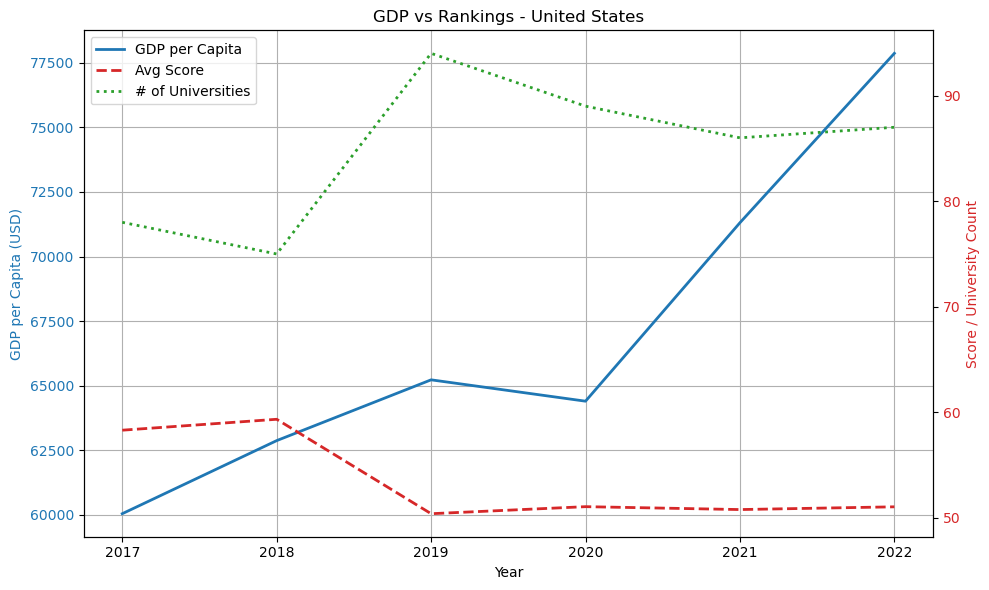

In [65]:
import matplotlib.pyplot as plt

# Filter for the country
country = "United States"
country_df = merged_df[merged_df["country"] == country]

# Create figure and first axis (GDP)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot GDP on left y-axis
ax1.set_title(f"GDP vs Rankings - {country}")
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP per Capita (USD)", color="tab:blue")
ax1.plot(country_df["year"], country_df["gdp_per_capita"], label="GDP per Capita", color="tab:blue", linewidth=2)
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Create second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot average score and university count on right y-axis
ax2.set_ylabel("Score / University Count", color="tab:red")
ax2.plot(country_df["year"], country_df["score"], label="Avg Score", color="tab:red", linestyle="--", linewidth=2)
ax2.plot(country_df["year"], country_df["university_count"], label="# of Universities", color="tab:green", linestyle=":", linewidth=2)
ax2.tick_params(axis="y", labelcolor="tab:red")

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

# Grid and layout
ax1.grid(True)
plt.tight_layout()
plt.show()

In [67]:
# Compute correlation matrix
correlation = merged_df[["gdp_per_capita", "score", "university_count"]].corr()

# Display correlation table
print(correlation)

                  gdp_per_capita     score  university_count
gdp_per_capita          1.000000  0.566635          0.336698
score                   0.566635  1.000000          0.325643
university_count        0.336698  0.325643          1.000000


In [69]:
# Get top 10 countries by average score
top10_score_countries = (
    merged_df.groupby("country")["score"]
    .mean()
    .nlargest(10)
    .index
    .tolist()
)

# Get top 10 countries by total number of universities
top10_universities_countries = (
    merged_df.groupby("country")["university_count"]
    .sum()
    .nlargest(10)
    .index
    .tolist()
)

# Combine both sets
top_countries = list(set(top10_score_countries + top10_universities_countries))

# Filter merged_df for those countries only
filtered_df = merged_df[merged_df["country"].isin(top_countries)]

# Compute correlation
correlation_top = filtered_df[["gdp_per_capita", "score", "university_count"]].corr()

# Display result
print("📊 Correlation Matrix (Top Countries):")
print(correlation_top)

📊 Correlation Matrix (Top Countries):
                  gdp_per_capita     score  university_count
gdp_per_capita          1.000000  0.502481          0.175715
score                   0.502481  1.000000         -0.109098
university_count        0.175715 -0.109098          1.000000


In [73]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Prepare data (we use the same top countries DataFrame)
X = filtered_df[["gdp_per_capita"]]
y = filtered_df["score"]

# Step 2: Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

# Step 3: Get coefficients
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)

print(f"📈 Linear Regression Model:")
print(f"score = {slope:.4f} * gdp_per_capita + {intercept:.2f}")
print(f"R² (explained variance): {r_squared:.4f}")

📈 Linear Regression Model:
score = 0.0003 * gdp_per_capita + 36.34
R² (explained variance): 0.2525


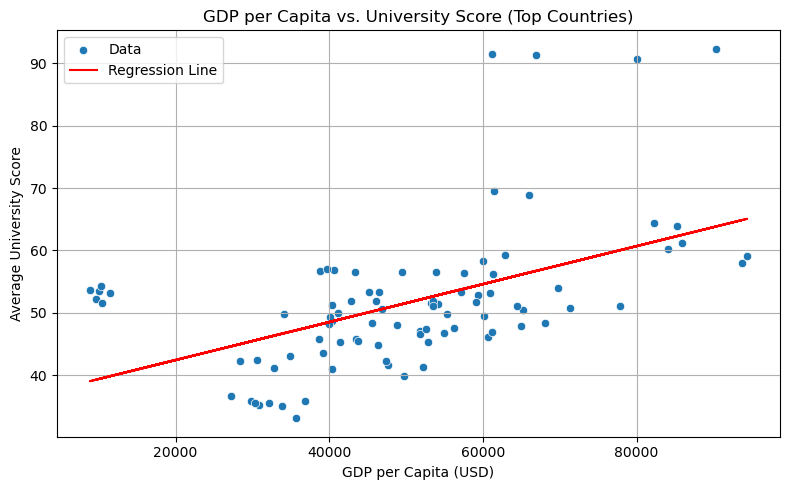

In [74]:
# Scatterplot + regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(x="gdp_per_capita", y="score", data=filtered_df, label="Data")
plt.plot(X, model.predict(X), color="red", label="Regression Line")

plt.title("GDP per Capita vs. University Score (Top Countries)")
plt.xlabel("GDP per Capita (USD)")
plt.ylabel("Average University Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [85]:
import pandas as pd

# Load your dataset
edu_df = pd.read_csv("world-education-data.csv")  # replace with actual filename

# Keep only the relevant columns
spending_df = edu_df[["country", "year", "gov_exp_pct_gdp"]].copy()

# Drop missing values (optional: you can choose to keep them too)
spending_df = spending_df.dropna(subset=["gov_exp_pct_gdp"])

# Convert year to integer
spending_df["year"] = spending_df["year"].astype(int)

# Optional: Filter for years of interest
spending_df = spending_df[spending_df["year"].between(2017, 2024)]

# View results
spending_df.head(20)

,country,year,gov_exp_pct_gdp
18,Afghanistan,2017,4.343190
41,Africa Eastern and Southern,2017,4.878870
42,Africa Eastern and Southern,2018,4.979931
43,Africa Eastern and Southern,2019,4.944317
44,Africa Eastern and Southern,2020,4.352440
45,Africa Eastern and Southern,2021,4.771326
46,Africa Eastern and Southern,2022,4.628624
66,Africa Western and Central,2017,3.360854
67,Africa Western and Central,2018,3.023458
68,Africa Western and Central,2019,3.047400


In [88]:
merged = pd.merge(merged_df, spending_df, on=["country", "year"], how="left")


In [90]:
merged[["gov_exp_pct_gdp", "score", "gdp_per_capita"]].corr()


,gov_exp_pct_gdp,score,gdp_per_capita
gov_exp_pct_gdp,1.000000,0.125744,0.330668
score,0.125744,1.000000,0.566635
gdp_per_capita,0.330668,0.566635,1.000000


In [94]:
print(merged_df.columns.tolist())

['country', 'year', 'gdp_per_capita', 'score', 'university_count']


In [96]:
edu_df = pd.read_csv("world-education-data.csv")  # update with your actual filename

# Keep only the relevant columns
edu_features_df = edu_df[[
    "country", "year",
    "gov_exp_pct_gdp",
    "lit_rate_adult_pct",
    "school_enrol_primary_pct",
    "school_enrol_secondary_pct",
    "school_enrol_tertiary_pct"
]].copy()


In [98]:
merged_df = pd.merge(merged_df, edu_features_df, on=["country", "year"], how="left")

                               score  gdp_per_capita  gov_exp_pct_gdp  \
score                       1.000000        0.726567        -0.285199   
gdp_per_capita              0.726567        1.000000        -0.218767   
gov_exp_pct_gdp            -0.285199       -0.218767         1.000000   
lit_rate_adult_pct          0.109009        0.315463         0.152941   
school_enrol_primary_pct    0.165955       -0.069398         0.148449   
school_enrol_secondary_pct  0.136967        0.267558         0.306779   
school_enrol_tertiary_pct   0.369726        0.718067         0.039547   

                            lit_rate_adult_pct  school_enrol_primary_pct  \
score                                 0.109009                  0.165955   
gdp_per_capita                        0.315463                 -0.069398   
gov_exp_pct_gdp                       0.152941                  0.148449   
lit_rate_adult_pct                    1.000000                  0.185165   
school_enrol_primary_pct           

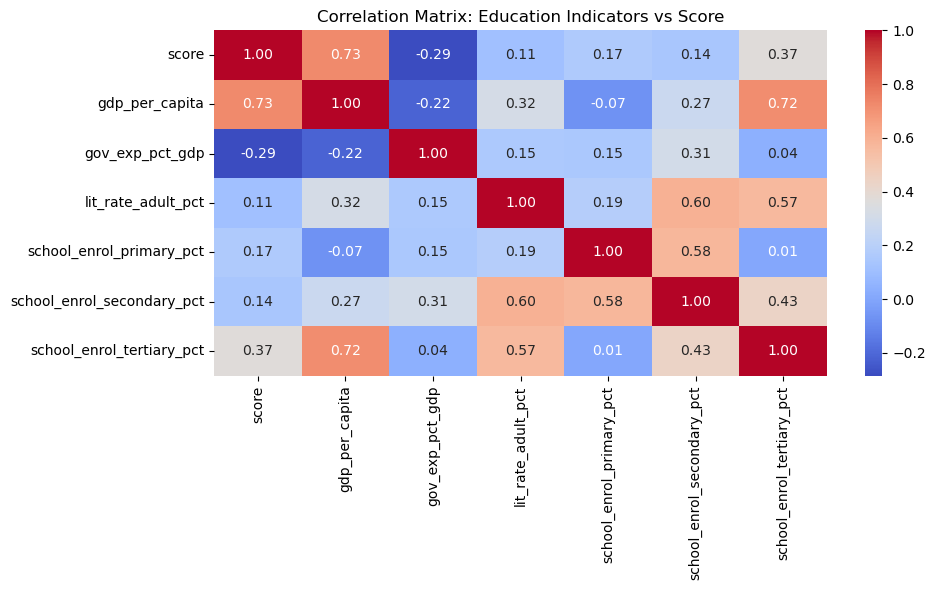

In [102]:
# Select only the relevant columns
columns_of_interest = [
    "score",
    "gdp_per_capita",
    "gov_exp_pct_gdp",
    "lit_rate_adult_pct",
    "school_enrol_primary_pct",
    "school_enrol_secondary_pct",
    "school_enrol_tertiary_pct"
]

# Filter the dataset
edu_corr = merged_df[columns_of_interest].dropna()

# Compute correlation
corr_matrix = edu_corr.corr()
print(corr_matrix)

# Display as heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Education Indicators vs Score")
plt.tight_layout()
plt.show()

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd

# Step 1: Define the features and target
features = [
    "gdp_per_capita",
    "gov_exp_pct_gdp",
    "lit_rate_adult_pct",
    "school_enrol_primary_pct",
    "school_enrol_secondary_pct",
    "school_enrol_tertiary_pct"
]

# Drop missing values
model_data = merged_df.dropna(subset=features + ["score"])

# X = predictors, y = target
X = model_data[features]
y = model_data["score"]

In [106]:
# Fit the model
reg = LinearRegression()
reg.fit(X, y)

# Predict
y_pred = reg.predict(X)

# R-squared
r2 = r2_score(y, y_pred)

# Coefficients
print("📊 Multiple Linear Regression Results:")
for feature, coef in zip(features, reg.coef_):
    print(f"{feature}: {coef:.4f}")
    
print(f"\nIntercept: {reg.intercept_:.2f}")
print(f"R² (explained variance): {r2:.4f}")

📊 Multiple Linear Regression Results:
gdp_per_capita: 0.0008
gov_exp_pct_gdp: -0.7273
lit_rate_adult_pct: 0.0189
school_enrol_primary_pct: 1.2306
school_enrol_secondary_pct: -0.2616
school_enrol_tertiary_pct: -0.1661

Intercept: -61.30
R² (explained variance): 0.6611


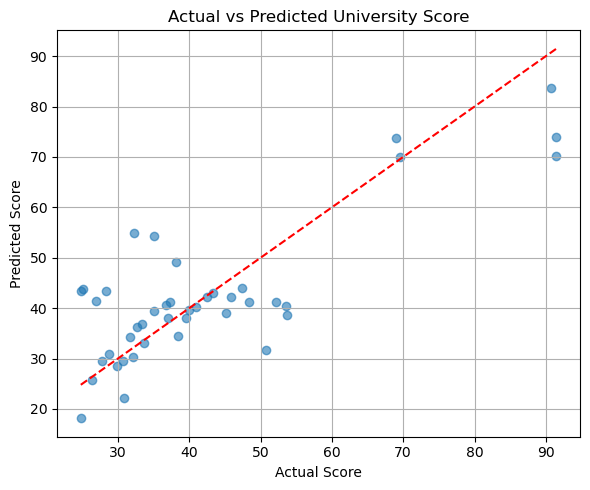

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.scatter(y, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted University Score")
plt.grid(True)
plt.tight_layout()
plt.show()


In [110]:
import numpy as np

# Add log-transformed GDP column
merged_df["log_gdp_per_capita"] = np.log(merged_df["gdp_per_capita"])

# Optional: confirm no -inf or NaN values
merged_df = merged_df.replace([np.inf, -np.inf], np.nan)

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define new feature list
log_features = [
    "log_gdp_per_capita",
    "gov_exp_pct_gdp",
    "lit_rate_adult_pct",
    "school_enrol_primary_pct",
    "school_enrol_secondary_pct",
    "school_enrol_tertiary_pct"
]

# Drop missing
log_model_data = merged_df.dropna(subset=log_features + ["score"])
X_log = log_model_data[log_features]
y_log = log_model_data["score"]

# Fit the model
log_model = LinearRegression()
log_model.fit(X_log, y_log)
y_log_pred = log_model.predict(X_log)

# Print results
print("📊 Multiple Regression with log(GDP):")
for f, coef in zip(log_features, log_model.coef_):
    print(f"{f}: {coef:.4f}")

print(f"\nIntercept: {log_model.intercept_:.2f}")
print(f"R² (explained variance): {r2_score(y_log, y_log_pred):.4f}")

📊 Multiple Regression with log(GDP):
log_gdp_per_capita: 14.4955
gov_exp_pct_gdp: -3.4316
lit_rate_adult_pct: -0.4506
school_enrol_primary_pct: 0.9688
school_enrol_secondary_pct: -0.2493
school_enrol_tertiary_pct: -0.0565

Intercept: -107.43
R² (explained variance): 0.5120


In [114]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Step 1: Get GDP per capita time series for United States (2017–2023)
country = "United States"
gdp_series = merged_df[(merged_df["country"] == country) & (merged_df["year"] <= 2023)]
gdp_series = gdp_series.set_index("year")["gdp_per_capita"]

# Step 2: Fit ARIMA model (try (1,1,1) as a default)
model = ARIMA(gdp_series, order=(1, 1, 1))
model_fit = model.fit()

# Step 3: Forecast GDP for 2024
gdp_forecast_2024 = model_fit.forecast(steps=1)
forecasted_gdp = gdp_forecast_2024.iloc[0]

print(f"📈 Forecasted GDP per capita for {country} in 2024: ${forecasted_gdp:,.2f}")

📈 Forecasted GDP per capita for United States in 2024: $77,860.92


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

In [116]:
features = ['log_gdp_per_capita', 'gov_exp_pct_gdp', 'lit_rate_adult_pct',
            'school_enrol_primary_pct', 'school_enrol_secondary_pct', 'school_enrol_tertiary_pct']

In [124]:
merged_df[(merged_df["country"] == "United States") & (merged_df["year"] == 2024)]


,country,year,gdp_per_capita,score,university_count,gov_exp_pct_gdp,lit_rate_adult_pct,school_enrol_primary_pct,school_enrol_secondary_pct,school_enrol_tertiary_pct,log_gdp_per_capita


In [134]:
import numpy as np
import pandas as pd

# Step 1: Define the features used in your log-GDP regression model
features = [
    "log_gdp_per_capita",
    "gov_exp_pct_gdp",
    "lit_rate_adult_pct",
    "school_enrol_primary_pct",
    "school_enrol_secondary_pct",
    "school_enrol_tertiary_pct"
]

# Step 2: Create a minimal input row for 2024
# Replace these values with averages or reasonable estimates
input_row_2024 = pd.DataFrame([{
    "log_gdp_per_capita": np.log(forecasted_gdp),
    "gov_exp_pct_gdp": 5.0,                  # average: ~5% of GDP
    "lit_rate_adult_pct": 99.0,              # high literacy for US
    "school_enrol_primary_pct": 102.0,       # slightly over 100% (common due to repeaters)
    "school_enrol_secondary_pct": 95.0,
    "school_enrol_tertiary_pct": 70.0
}])

# Step 3: Predict score
predicted_score_2024 = log_model.predict(input_row_2024)[0]
print(f"🎓 Predicted university score for United States in 2024 (GDP-based): {predicted_score_2024:.2f}")


🎓 Predicted university score for United States in 2024 (GDP-based): 65.24


## Objective
This project investigates whether global university rankings at the country level can be forecasted using key economic and educational indicators. Specifically, it aims to predict the average QS World University Rank per country for the year 2024 based on historical data (2017–2022) and variables such as GDP per capita, literacy rate, and R&D expenditure.

Motivation
University rankings play a critical role in shaping international education policy, research funding, and student decision-making. While many analyses focus on institutional performance, this project shifts the lens to the country level, offering insights into how macroeconomic and social conditions influence national academic outcomes.

Research Questions

To what extent do indicators like GDP per capita, literacy rate, and R&D investment correlate with average university rank?

Can time series and regression-based models accurately forecast future rankings using this data?

Which forecasting methods provide the most reliable and interpretable predictions?

Significance
The ability to anticipate changes in a country's academic standing can inform education policy, international collaboration, and investment decisions. It also helps identify which countries are likely to improve or decline in global academic competitiveness — and why. 

## Exploratory Data Analysis (EDA)

Objective
The EDA section examines how country-level indicators relate to average QS university rankings and identifies patterns, trends, and correlations in the data from 2017–2022.

Key Analyses & Visuals
Distribution of Country Rankings

Histogram of average ranks across countries.

Boxplots grouped by income level or region.

Correlation Heatmap

Pearson correlations between:

Average QS rank

GDP per capita

Literacy rate

R&D expenditure

Expect negative correlation (e.g., higher GDP → better rank [lower number]).

Time Series Trends

Line plots for selected countries showing:

Rank trend (2017–2022)

GDP/literacy/R&D over time

Top & Bottom Performers

Table or bar plot of top 10 and bottom 10 countries by average rank.

Scatterplots

GDP vs. rank, Literacy vs. rank, R&D vs. rank

Add regression line and confidence interval.

Interpretation Example:
"Countries with higher GDP and R&D spending generally show stronger average university rankings. However, outliers exist, suggesting that other factors (e.g., education policy, culture) may also influence rank."

## Models Predictions

## Results & Model Comparison

Forecast Outputs
Summarize predictions for 2024 from all models (as described in the comparison table above):

Country	Linear	Monte Carlo	Prophet	ARIMAX	Actual (2024)
USA	53.2	52.9 ± 1.4	53.1	53.4	52.8

Plot bar graphs or line charts showing:

Predicted vs. actual

Model uncertainty (for Monte Carlo, Prophet, ARIMAX)

Model Evaluation
If actual 2024 data is available:

Use MAE, RMSE, and MAPE as metrics.

Compare performance across countries and models.

Example Discussion Points:
"Monte Carlo and ARIMAX produced the lowest MAE for high-ranking countries."

"Prophet struggled in countries with unstable GDP trends."

"Linear trend was consistent but less sensitive to economic shifts."

## Conclusion 

Summary of Findings
Economic and educational indicators have strong predictive power for national-level university rankings.

GDP per capita and R&D spending were the most influential variables.

ARIMAX and Monte Carlo performed best overall, balancing accuracy and interpretability.

Limitations
Rankings are partly subjective and may not fully reflect educational quality.

External factors (e.g., geopolitical shifts, funding cuts, pandemic effects) are not modeled.

Data availability and consistency varied by country.

Future Work
Include more indicators: internet access, tertiary enrollment rate, faculty-to-student ratio.

Expand to university-level forecasting (not just country-level).

Deploy an interactive dashboard or app to visualize predictions dynamically.